The coordinates of the start point are (52.3671947, 4.919245) and of the end point: (52.3862001, 4.8812058)
Node found.
Node found.
The nodes of the whole path are [3781170134, 323929882, 331854233, 8010136114, 252142901, 324827507, 305155548, 305155547, 305156166, 8003741421, 9407684484, 324128505, 324126395, 1195429031, 730950175, 277138134, 178261171, 60740843, 117738457, 154546029, 305084168, 305082709, 305081090]
The 12 th node is the middle one with the corresponding OSMid being: 324126395
The length of the path in meters is 5004.24


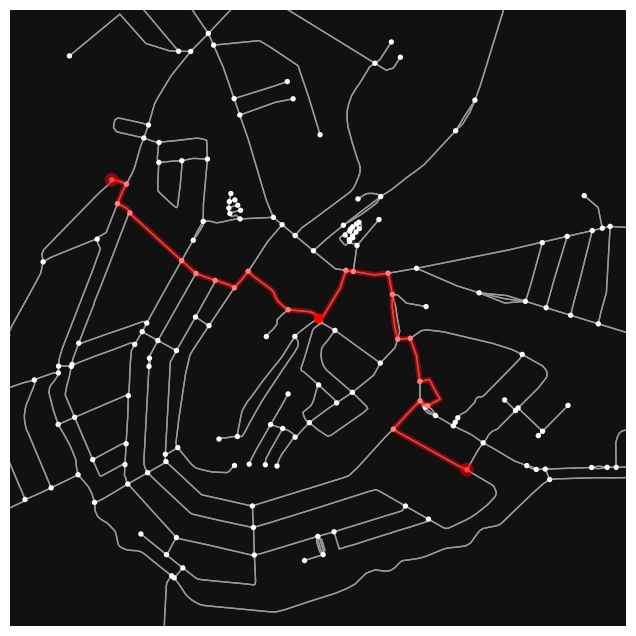

In [66]:
import osmnx as ox
import networkx as nx
import math
import warnings

#Hides annoying warnings :)
warnings.filterwarnings('ignore')

#Find coordinates of Artis (start point)
location_ARTIS = ox.geocode("Entrepotdok 86, Amsterdam, Netherlands")

#Find coordinates of Westerpark (end point)
location_Westerpark = ox.geocode("Westerpark 1, Amsterdam, Netherlands")
print('The coordinates of the start point are', location_ARTIS, 'and of the end point:', location_Westerpark)

#This gets all the canal data from Amsterdam
canals = ox.graph_from_place('Amsterdam, Netherlands', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canal"]')

#Find the nearest nodes nearest node
nodes_ARTIS = ox.distance.nearest_nodes(canals, location_ARTIS[1], location_ARTIS[0], return_dist=True)
nodes_Westerpark = ox.distance.nearest_nodes(canals, location_Westerpark[1], location_Westerpark[0], return_dist=True)

#Check if nodes exist
if nodes_ARTIS[0] in canals.nodes:
    print("Node found.")
if nodes_Westerpark[0] in canals.nodes:
    print("Node found.")

#This loop ensures a route is found between the start and end point of at least 5000m
L = 5000 #The route is 5000m long
path = ox.k_shortest_paths(canals, nodes_ARTIS[0], nodes_Westerpark[0], 1000, 'length')
for i, path in enumerate(path):
    length = sum(ox.utils_graph.get_route_edge_attributes(canals, path, 'length'))
    if length >= L:
        break
i, length, path

#These are the nodes of the path
print('The nodes of the whole path are', path)

#Since the path is an odd list, this calculates the middle node
middle_node = math.ceil(len(path) / 2)
print('The', middle_node, 'th node is the middle one with the corresponding OSMid being:', path[middle_node])

#Zoom in with middle point as center for bbox
node_middle = canals.nodes(data=True)[path[middle_node]]
bbox = ox.utils_geo.bbox_from_point((node_middle['y'], node_middle['x']), dist=2200)

#Plot graph of canals
pt = ox.graph_to_gdfs(canals, edges=False).unary_union.centroid
fig, ax = ox.plot_graph_route(canals, path, bbox=bbox, show=False, close=False)

#Plots the middle node of route
ax.scatter(canals.nodes[path[12]]['x'], canals.nodes[path[12]]['y'], c='red')

#This calculates the length of the path
lengths = ox.utils_graph.get_route_edge_attributes(canals, path, 'length')
path_length = sum(lengths)
print('The length of the path in meters is', path_length)


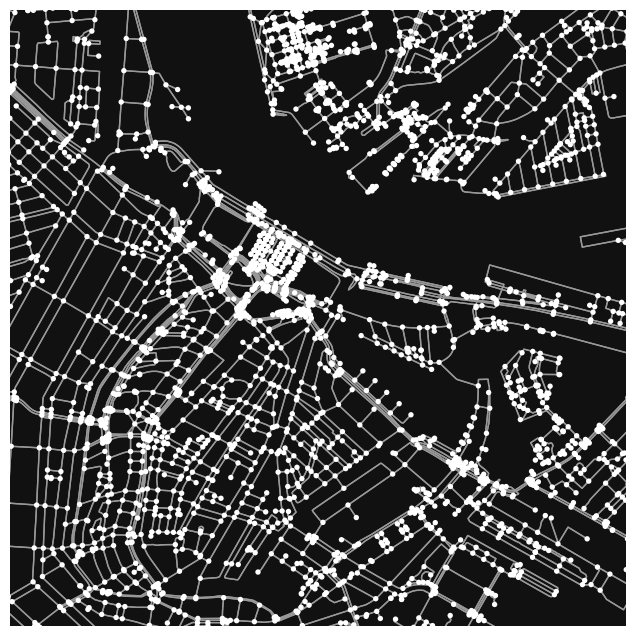

In [67]:
#This gets all the walkway data from Amsterdam
walk = ox.graph_from_place('Amsterdam, Netherlands', network_type='walk')

#Plot graph of walkways
bbox = ox.utils_geo.bbox_from_point((node_middle['y'], node_middle['x']), dist=1200)
fig, ax = ox.plot_graph(walk, bbox=bbox, show=False, close=False)
#ax.scatter(canals.nodes[node_middle['x']], canals.nodes[node_middle['y']], c='red')
ax.scatter(52.3768364, 4.9027817, c='red')


In [70]:
#First we convert the coordinates of the start, middle and end point to nodes within the walk network
nodes_ARTIS_walk = ox.distance.nearest_nodes(walk, location_ARTIS[1], location_ARTIS[0], return_dist=True)
nodes_Westerpark_walk = ox.distance.nearest_nodes(walk, location_Westerpark[1], location_Westerpark[0], return_dist=True)
nodes_middle_walk = ox.distance.nearest_nodes(walk, node_middle['y'], node_middle['x'], return_dist=True)
#print(nodes_ARTIS_walk, nodes_Westerpark_walk, nodes_middle_walk)

In [71]:
#Use networkx to calculate the centrality
start_centrality = nx.closeness_centrality(walk, u=nodes_ARTIS_walk[0])
middle_centrality = nx.closeness_centrality(walk, u=nodes_middle_walk[0])
end_centrality = nx.closeness_centrality(walk, u=nodes_Westerpark_walk[0])

#Then we can print the centrality values
print('The centrality of the startpoint is', start_centrality)
print('The centrality of the startpoint is', middle_centrality)
print('The centrality of the startpoint is', end_centrality)


The centrality of the startpoint is 0.01153460086131152
The centrality of the startpoint is 0.008907654888152539
The centrality of the startpoint is 0.012052989791365199


In [ ]:
#References
'''
https://github.com/gboeing/osmnx-examples
https://wiki.openstreetmap.org/wiki/Key:highway
https://networkx.org/documentation/stable/reference/algorithms/centrality.html
https://osmnx.readthedocs.io/en/stable/user-reference.html#
https://bookdown.org/markhoff/social_network_analysis/centrality.html#closeness-centrality
https://stackoverflow.com/questions/49460880/adding-a-point-to-an-osmnx-plot
'''
